In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# DESCRIPTION

This dataset is used for binary classification in machine learning, where the goal is to predict whether a loan will be approved or not based on applicant details.

 Dataset Overview

Total records: 614

Total features: 13

Problem type: Supervised Learning

Task: Classification

Target variable: Loan_Status



## Objective of the Dataset

A bank wants to automate the loan approval process by analyzing customer information such as income, education, credit history, and property area.

The model predicts:

Y → Loan Approved

N → Loan Rejected

In [ ]:
df = pd.read_csv('/content/Loan_Predication_dataset.csv')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
### numerical columns

In [ ]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
num_imputer = SimpleImputer(strategy='median')
df[num_cols] =  num_imputer.fit_transform(df[num_cols])

# selects numeric columns
# fills missing values using mediam

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])
# select text columns
# fills missing values using most common values

In [ ]:
df.drop('Loan_ID',axis=1,inplace=True)
# remove lone Id

In [ ]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.072991,-0.554487,-0.211241,0.273231,0.411733,Urban,Y
1,Male,Yes,1,Graduate,No,-0.134412,-0.038732,-0.211241,0.273231,0.411733,Rural,N
2,Male,Yes,0,Graduate,Yes,-0.393747,-0.554487,-0.948996,0.273231,0.411733,Urban,Y
3,Male,Yes,0,Not Graduate,No,-0.462062,0.251980,-0.306435,0.273231,0.411733,Urban,Y
4,Male,No,0,Graduate,No,0.097728,-0.554487,-0.056551,0.273231,0.411733,Urban,Y


In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.072991,-0.554487,-0.211241,0.273231,0.411733,Urban,Y
1,Male,Yes,1,Graduate,No,-0.134412,-0.038732,-0.211241,0.273231,0.411733,Rural,N
2,Male,Yes,0,Graduate,Yes,-0.393747,-0.554487,-0.948996,0.273231,0.411733,Urban,Y
3,Male,Yes,0,Not Graduate,No,-0.462062,0.251980,-0.306435,0.273231,0.411733,Urban,Y
4,Male,No,0,Graduate,No,0.097728,-0.554487,-0.056551,0.273231,0.411733,Urban,Y


In [ ]:
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Encode categorical features in x
for col in x.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])

# Encode the target variable y
le_y = LabelEncoder()
y = le_y.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7886178861788617


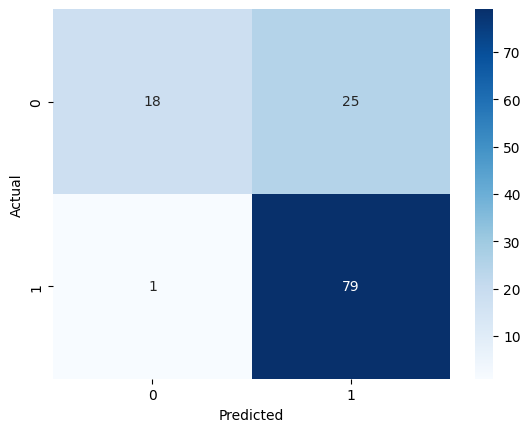

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [ ]:
## predict new lone application


new_data = np.array([[1,0,0,1,0,5000,0,150,360,1,2]])
prediction = model.predict(new_data)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
if prediction[0] == 1:
    print("Loan will be approved")
else:
    print("Loan will not be approved")


Loan will not be approved


In [1]:
### decision tree classifire

## Decision tree classifire
Decision Tree Classification is a supervised machine learning algorithm used to solve classification problems (when the output is categorical, like Yes/No, Spam/Not Spam, Approve/Reject).

In [ ]:
# encode categorical variavles

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


# ml models canot understand text so:
#convert categorical value into 0s and 1s , drop_first=True avoids duplicate columns.


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.072991,-0.554487,-0.211241,0.273231,0.411733,True,False,False,False,False,False,False,False,True,True
1,-0.134412,-0.038732,-0.211241,0.273231,0.411733,True,True,True,False,False,False,False,False,False,False
2,-0.393747,-0.554487,-0.948996,0.273231,0.411733,True,True,False,False,False,False,True,False,True,True
3,-0.462062,0.251980,-0.306435,0.273231,0.411733,True,True,False,False,False,True,False,False,True,True
4,0.097728,-0.554487,-0.056551,0.273231,0.411733,True,False,False,False,False,False,False,False,True,True


In [ ]:
## Separate Features and Target

x = df_encoded.drop('Loan_Status_Y',axis=1)
y = df_encoded['Loan_Status_Y']


In [ ]:
## split data into training and testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# create decision tree model


dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=42
)

### criterion='gini' → Method to split data (measures impurity)
##max_depth=5 → Limits tree depth to prevent overfitting
#random_state=42 → Reproducibilit

In [ ]:
# train the model
dt_model.fit(x_train, y_train)

#Model learns patterns from training data
#Builds decision rules like:

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
# make predictions
y_pred = dt_model.predict(x_test)

#Uses trained model to predict loan approval on test data

In [ ]:
# evaluate the model
# accuracy

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7560975609756098


In [ ]:
#confusion matrix

confusion_matrix(y_test, y_pred)

array([[18, 25],
       [ 5, 75]])

In [ ]:
#classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.78      0.42      0.55        43
        True       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123

